In [ ]:
import tensorflow.keras as K
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(X, Y):
    X_p = K.applications.vgg16.preprocess_input(X)
    Y_p = K.utils.to_categorical(Y, 10)
    return (X_p, Y_p)

def decay(epoch):
    return 0.001 / (1 + 1 * 30)


In [ ]:
if __name__ == "__main__":
    (x_train, y_train), (x_test, y_test) = K.datasets.cifar10.load_data()
    x_train_p, y_train_p = preprocess_data(x_train, y_train)
    x_test_p, y_test_p = preprocess_data(x_test, y_test)

    # Data augmentation for training and testing
    train_datagen = K.preprocessing.image.ImageDataGenerator(
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
    )

    test_datagen = K.preprocessing.image.ImageDataGenerator()  # No augmentation for testing

    train_datagen.fit(x_train_p)
    test_datagen.fit(x_test_p)


In [ ]:
    base_model = K.applications.vgg16.VGG16(include_top=False,
                                            weights='imagenet',
                                            pooling='avg',
                                            input_shape=(32,32,3)
                                           )

    model = K.Sequential([
        base_model,
        K.layers.Flatten(),
        K.layers.Dense(256, activation='relu'),
        K.layers.Dropout(0.5),  # Adding dropout regularization
        K.layers.Dense(10, activation='softmax')
    ])


In [ ]:
    callbacks = [K.callbacks.LearningRateScheduler(decay, verbose=1),
                 K.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
                 K.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)]

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    history = model.fit(train_datagen.flow(x_train_p, y_train_p, batch_size=128),
                        epochs=30,
                        steps_per_epoch=len(x_train) / 128,
                        validation_data=test_datagen.flow(x_test_p, y_test_p, batch_size=128),
                        validation_steps=len(x_test) / 128,
                        callbacks=callbacks,
                        verbose=1
                       )


In [ ]:
    # Evaluate the model
    test_loss, test_acc = model.evaluate(x_test_p, y_test_p)
    print('Test accuracy:', test_acc)



Epoch 1: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 1/30
391/391 [==============================] - 28s 62ms/step - loss: 2.2094 - accuracy: 0.2533 - val_loss: 1.6356 - val_accuracy: 0.4117 - lr: 3.2258e-05

Epoch 2: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 2/30
391/391 [==============================] - 24s 60ms/step - loss: 1.3515 - accuracy: 0.5388 - val_loss: 0.8522 - val_accuracy: 0.7328 - lr: 3.2258e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 3/30
391/391 [==============================] - 23s 59ms/step - loss: 0.8065 - accuracy: 0.7501 - val_loss: 0.6611 - val_accuracy: 0.7891 - lr: 3.2258e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 4/30
391/391 [==============================] - 23s 59ms/step - loss: 0.5937 - accuracy: 0.8157 - val_loss: 0.5560 - val_accuracy: 0.8234 - lr: 3.2258e-05

Epoch 5: LearningRateScheduler 

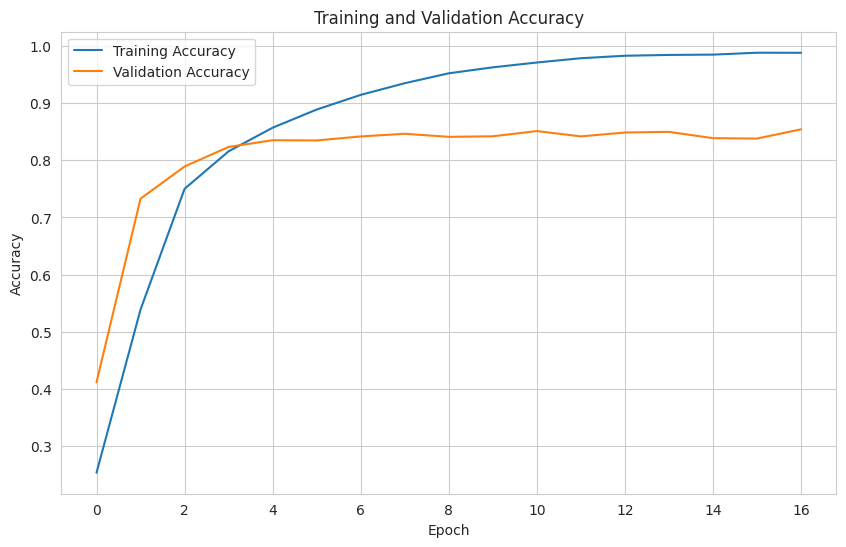

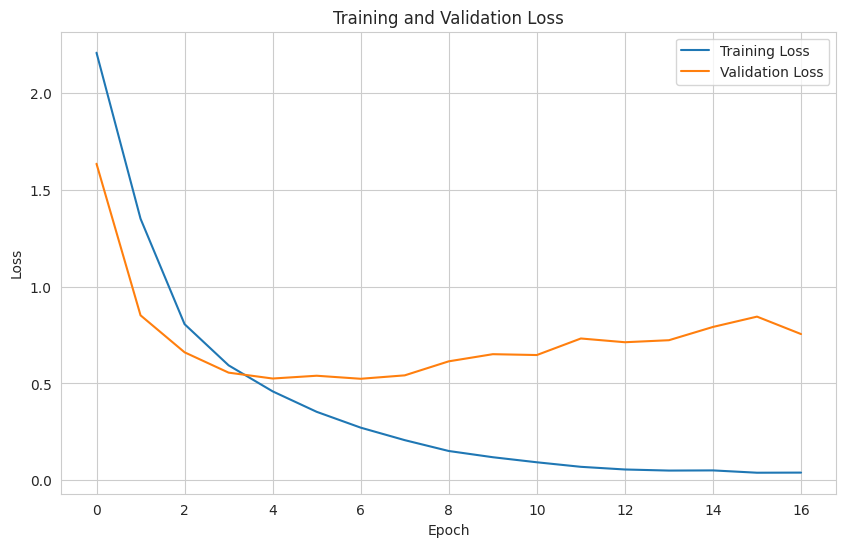

In [ ]:


    # Plot training and validation accuracy
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.lineplot(data=history.history['accuracy'], label='Training Accuracy')
    sns.lineplot(data=history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Plot training and validation loss
    plt.figure(figsize=(10, 6))
    sns.set_style("whitegrid")
    sns.lineplot(data=history.history['loss'], label='Training Loss')
    sns.lineplot(data=history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
